IMPORT ALL PACKAGES TO BE USED

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

READ & CONVERT DATA FILE INTO DATAFRAME TO USE LATER

In [4]:
df_911calls = pd.read_csv('911.csv') #this dataset contains around 100k of 911 calls across US states during 2015-2016

In [5]:
df_911calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df_911calls.info() #figuring out that column timeStamp does not have correct data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
# convert column timeStamp to correct data type 
df_911calls['timeStamp'] = pd.to_datetime(df_911calls['timeStamp'])

In [8]:
# create related Date columns from column timeStamp
df_911calls['Date'] = df_911calls['timeStamp'].apply(lambda x: x.date())
df_911calls['Year'] = df_911calls['timeStamp'].apply(lambda x: x.year)
df_911calls['Month'] = df_911calls['timeStamp'].apply(lambda x: x.month)
df_911calls['Day'] = df_911calls['timeStamp'].apply(lambda x: x.day)
df_911calls['Day of the Week No'] = df_911calls['timeStamp'].apply(lambda x: x.dayofweek)

In [9]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_911calls['Day of the Week'] = df_911calls['Day of the Week No'].map(dmap)

In [10]:
# column title has repeated main reasons at the front, we can create new column to group those reasons :
df_911calls['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [11]:
# create new column to classify reasons based on title call:
df_911calls['Reason'] = df_911calls['title'].apply(lambda x: x.split(':')[0])

In [12]:
df_911calls['Reason'].unique() # now column Reason have 3 unique values

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [13]:
#reasons with no. of calls:
df_911calls['Reason'].value_counts() 

#EMS stands for Emergency Medical System 
# => in this dataset, the most common reason people call 911 is due to emergency care needed, 
# following by traffic accidents and fire

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [14]:
#top 15 towns with highest 911 calls:
df_911calls['twp'].value_counts().head(15)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
MONTGOMERY          2698
UPPER DUBLIN        2638
WHITEMARSH          2526
UPPER PROVIDENCE    2313
LIMERICK            2272
Name: twp, dtype: int64

In [15]:
# select top 15 towns account for 60% of total calls and assign the rest "others" for easier analysis
top15twp60per = ['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'UPPER MERION','CHELTENHAM', 'POTTSTOWN', 'UPPER MORELAND', 'LOWER PROVIDENCE',    
            'PLYMOUTH', 'HORSHAM','MONTGOMERY', 'UPPER DUBLIN', 'WHITEMARSH', 'UPPER PROVIDENCE', 'LIMERICK' ]

In [16]:
df_911calls_15towns = df_911calls[df_911calls['twp'].isin(top15twp60per)]
df_911calls_15towns.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Year,Month,Day,Day of the Week No,Day of the Week,Reason
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,2015-12-10,2015,12,10,3,Thu,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10,2015,12,10,3,Thu,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,2015-12-10,2015,12,10,3,Thu,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,2015-12-10,2015,12,10,3,Thu,Traffic
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,2015-12-10,2015,12,10,3,Thu,Traffic


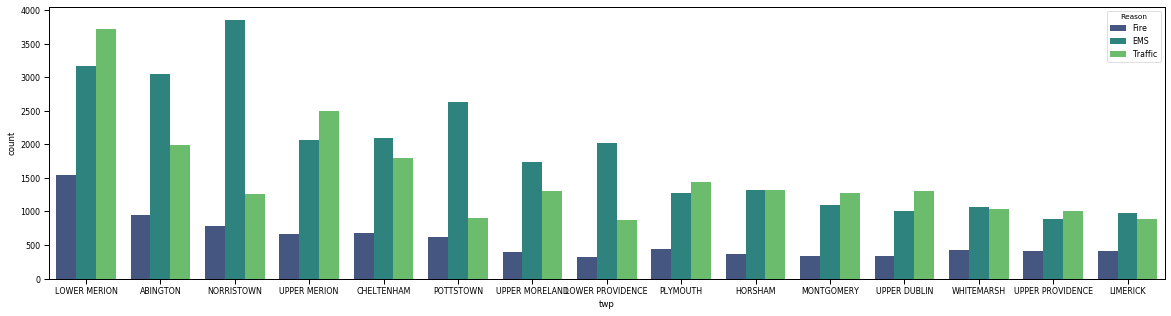

In [17]:
# plotting 911 reasons by top 15 towns with descending order
fig = plt.figure(figsize=(20,5))
sns.set_context("paper", font_scale=0.90)
sns.countplot(data=df_911calls_15towns, x='twp', hue='Reason', palette='viridis',
             order=df_911calls_15towns['twp'].value_counts().index)

# => from the chart we can see that reason Fire is still the least reason across top 15 towns, Traffic and EMS replace
# each other in position #1 and #2. Top 1 town is Lower Merion with highest reason belongs to Traffic. Norristown has
# abnormally high ratio of EMS calls, maybe this town has more elderly people? 

Text(0.5, 1.0, 'Total 911 calls - Traffic')

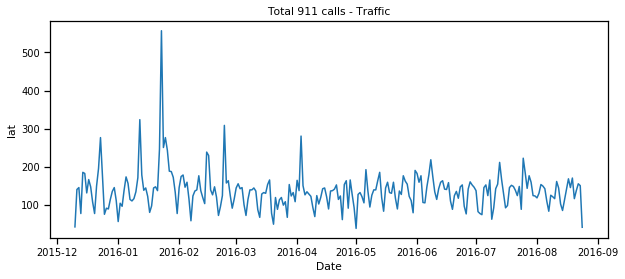

In [18]:
# plotting total calls by date and by reasons to see any unusual surge:
fig = plt.figure(figsize=(10,4))
sns.set_context("notebook", font_scale=0.9)
sns.lineplot(data=df_911calls[df_911calls['Reason']=='Traffic'].groupby('Date').count().reset_index(), x="Date", y='lat' )
plt.title('Total 911 calls - Traffic')

Text(0.5, 1.0, 'Total 911 calls - EMS')

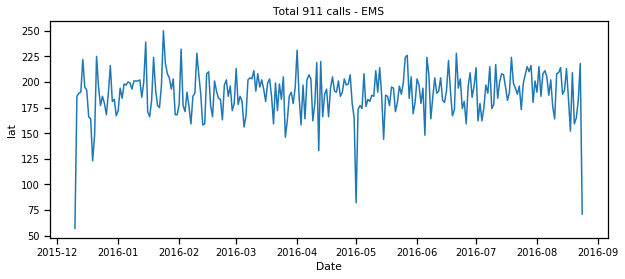

In [19]:
fig = plt.figure(figsize=(10,4))
sns.set_context("notebook", font_scale=0.9)
sns.lineplot(data=df_911calls[df_911calls['Reason']=='EMS'].groupby('Date').count().reset_index(), x="Date", y='lat' )
plt.title('Total 911 calls - EMS')

Text(0.5, 1.0, 'Total 911 calls - Fire')

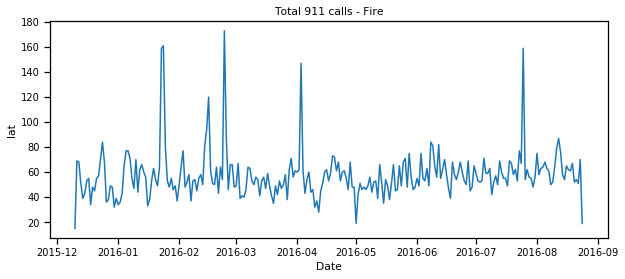

In [20]:
fig = plt.figure(figsize=(10,4))
sns.set_context("notebook", font_scale=0.9)
sns.lineplot(data=df_911calls[df_911calls['Reason']=='Fire'].groupby('Date').count().reset_index(), x="Date", y='lat')
plt.title('Total 911 calls - Fire')

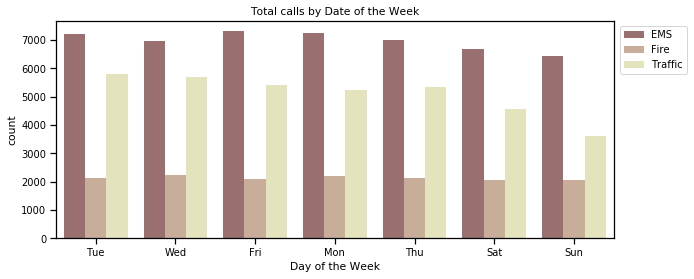

In [21]:
# total calls by Date of the Week:
fig = plt.figure(figsize=(10,4))
sns.set_context("notebook", font_scale=0.9)
sns.countplot(data=df_911calls, x='Day of the Week', hue='Reason', palette='pink', 
             order=df_911calls['Day of the Week'].value_counts().index)
plt.title('Total calls by Date of the Week')
plt.legend(loc='upper right',  bbox_to_anchor=(1.14, 1))

# => from below chart we can see that Sunday is the day with lowest calls on all reasons, 
# and Fire surprisingly seems to have the same no. of calls across Day of the Week

THANK YOU FOR READING! ^^